# Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv", encoding='latin-1')


df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231,NaN,NaN,NaN,NaN
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400,NaN,NaN,NaN,NaN
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60,NaN,NaN,NaN,NaN
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488,NaN,NaN,NaN,NaN
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17,NaN,NaN,NaN,NaN


# Drop the last four column as they can only contain NaN values

In [4]:
df.drop(['Unnamed: 9', 'Unnamed: 10','Unnamed: 11', 'Unnamed: 12'], axis = 1, inplace = True)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


# Exploratory Data Analysis

# DataFrame Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [7]:
df.shape

(13320, 9)

In [8]:
df.describe()

,bath,balcony
count,13247.000000,12711.000000
mean,2.692610,1.584376
std,1.341458,0.817263
min,1.000000,0.000000
25%,2.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,2.000000
max,40.000000,3.000000


from above data we can see that there are some outliers in our dataset

# Data Preprocessing and Data visualization

 Missing values

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

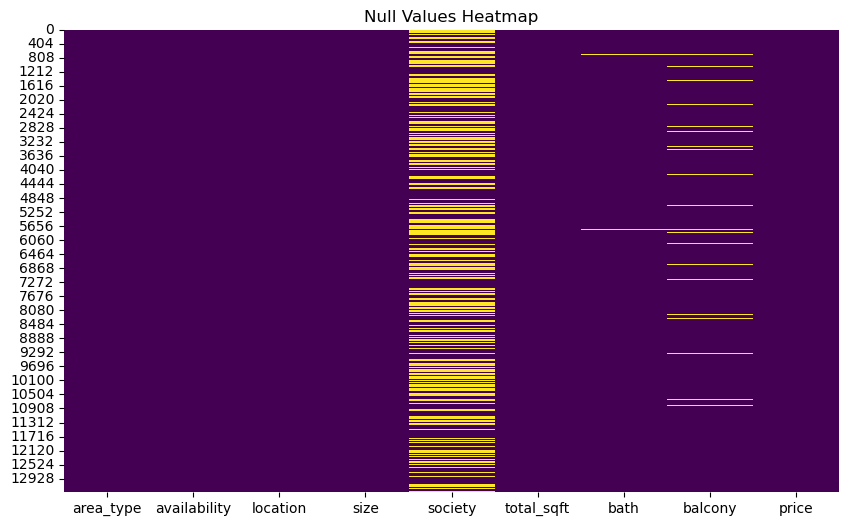

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Null Values Heatmap")
plt.show()

as we can see there are lots of missing values in society column so we can drop that, but some features has very very less null values so not showing on heatmap

In [11]:
df.drop('society', axis = 1, inplace = True)

we have only one null value in location column so we can remove that

In [12]:
df.dropna(subset=['location'], inplace=True)

fill the null values in size column with mode

In [13]:
mode_value = df['size'].mode()[0]
df['size'].fillna(mode_value, inplace=True)

fill null values in bath column with mean

In [14]:
mean_value = df['bath'].mean()
df['bath'].fillna(mean_value, inplace=True)

In [15]:
median_value = df['balcony'].median()
df['balcony'].fillna(median_value, inplace=True)

In [16]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

Check for duplicate values

In [17]:
df.duplicated().sum()

551

as we can see that our dataset has 550 duplicate values so we will be removing that

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

# scatter plot for balcony and price

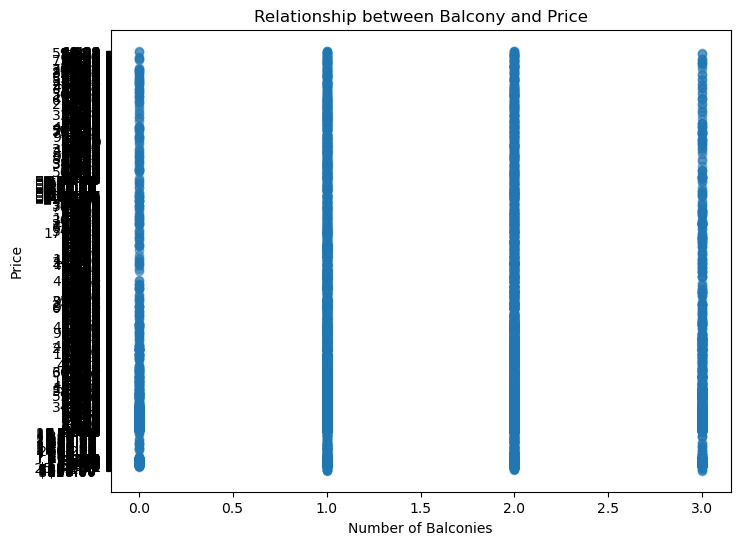

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['balcony'], df['price'], alpha=0.5)
plt.xlabel('Number of Balconies')
plt.ylabel('Price')
plt.title('Relationship between Balcony and Price')
plt.show()


here we can easily see that there is no good relationship between balcony and price so we will drop balcony feature

In [21]:
df.drop('balcony', axis = 1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12768 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12768 non-null  object 
 1   availability  12768 non-null  object 
 2   location      12768 non-null  object 
 3   size          12768 non-null  object 
 4   total_sqft    12768 non-null  object 
 5   bath          12768 non-null  float64
 6   price         12768 non-null  object 
dtypes: float64(1), object(6)
memory usage: 798.0+ KB


# we can not handle null values directly as some features contain special characters with them so we have to remove these non numeric characters and make these values numeric and then treat the null values

Drop less important features like availability as this is not contributing in predicting the price

In [23]:
df.drop('availability' ,axis = 1, inplace = True)

# Handle location feature

In [24]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df['location'].unique())

1305

We have 1305 unique features which is huge.here the number is too big & encoding would not be appropriate.

check how many count each unique value has

In [26]:
location_counts = df['location'].value_counts()
location_counts

Whitefield                        524
Sarjapur  Road                    379
Electronic City                   289
Kanakpura Road                    242
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

To deal with it, we can convert some location to 'Other'Category. Locations which has few data points, we will convert it to 'Other' category

In [27]:
location_counts = df['location'].str.strip().value_counts()
locations_to_convert = location_counts[location_counts <= 10].index

# Replace locations with counts less than or equal to 10 with 'Other'
df['location'] = df['location'].apply(lambda x: 'Other' if x in locations_to_convert else x)

In [28]:
other_count = df['location'].value_counts().get('Other', 0)

print("Count of 'Other' category:", other_count)

Count of 'Other' category: 2852


# Handle Size Feature

In [29]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here we can see that Somewhere the columns are BHK, somewhere it says Bedroom, somewhere it is only hk .to handle such data, 
we will create a new column bhk that will only hold the value of the data

In [30]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [31]:
df['size'] = df['size'].astype(str)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else None)


drop size feature as we created a new feature bhk

In [32]:
df.drop('size', axis = 1, inplace = True)

In [33]:
df.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,$39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,$120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,$62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,$95.00,3
4,Super built-up Area,Kothanur,1200,2.0,$51.00,2


# Handle total_sqft feature

In [34]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [35]:
df['total_sqft'] = df['total_sqft'].astype(str)
has_non_numeric_chars = df['total_sqft'].str.contains('[^0-9.]').any()

if has_non_numeric_chars:
    print("The target variable contains non-numeric characters.")
else:
    print("The target variable only contains numeric values.")


The target variable contains non-numeric characters.


as we can see that this feature has some range values, some non numeric values, here we can convert range values  into an  average value and remove non numeric values

In [36]:
import re
import numpy as np

df['total_sqft'] = df['total_sqft'].replace('[^0-9.-]', '', regex=True)
df['total_sqft'] = df['total_sqft'].str.rstrip('.')

def convert_to_float(value):
    if '-' in value:
        range_values = value.split('-')
        converted_values = []
        for val in range_values:
            try:
                converted_values.append(float(val))
            except ValueError:
                return np.nan
        return np.mean(converted_values)
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_to_float)


In [37]:
df.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,$39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,$120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,$62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,$95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,$51.00,2


fill null values in balcony column with median

# Handle target variable

In [38]:
df['price'].unique()

array([' $39.07 ', ' $120.00 ', ' $62.00 ', ..., '40.14', '231', '488'],
      dtype=object)

check if the target variable has any range value in it

In [39]:
unique_values = df['price'].unique()

# Check if any unique value contains a range character (e.g., '-')
has_range_values = any('-' in value for value in unique_values)

if has_range_values:
    print("The target variable contains range values.")
else:
    print("The target variable does not contain range values.")


The target variable contains range values.


so the target variable has some range values along with $, ?, \x80sign so we have to remove them

remove $, ?, \x80 sign from target variable

In [40]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace('?', '')
df['price'] = df['price'].str.replace('\x80', '')
# Calculate the average value of the range
df['price'] = df['price'].apply(lambda x: (float(x.split('-')[0]) + float(x.split('-')[1])) / 2 if '-' in x else float(x))

In [41]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [42]:
df.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


# Outlier detection

In [43]:
df.describe()

,total_sqft,bath,price,bhk
count,12768.000000,12768.000000,12768.000000,12768.000000
mean,1566.212195,2.709239,117.641153,2.817513
std,1261.337500,1.354969,402.684472,1.312370
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1280.000000,2.000000,73.000000,3.000000
75%,1690.000000,3.000000,121.250000,3.000000
max,52272.000000,40.000000,42278.000000,43.000000


we know that normally a room size is between 150 and 300 square feet lets assume that 250 square feet is the normal size of a room

we wiil be removing the datapoints have size <250 sqare feet

In [44]:
df= df[~(df.total_sqft/df.bhk <250)]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12127 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12127 non-null  object 
 1   location    12127 non-null  object 
 2   total_sqft  12127 non-null  float64
 3   bath        12127 non-null  float64
 4   price       12127 non-null  float64
 5   bhk         12127 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 663.2+ KB


In [46]:
df.describe()

,total_sqft,bath,price,bhk
count,12127.000000,12127.000000,12127.000000,12127.000000
mean,1602.107109,2.589227,116.915677,2.678568
std,1281.358219,1.130218,412.790534,1.036727
min,250.000000,1.000000,8.000000,1.000000
25%,1113.060000,2.000000,50.000000,2.000000
50%,1305.000000,2.000000,70.000000,3.000000
75%,1711.500000,3.000000,120.000000,3.000000
max,52272.000000,27.000000,42278.000000,27.000000


we can also find the outlier on the basis of price per squaee feet 

In [47]:
 df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [48]:
df.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [49]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12127.000000,12127.000000,12127.000000,12127.000000,12127.000000
mean,1602.107109,2.589227,116.915677,2.678568,6485.399600
std,1281.358219,1.130218,412.790534,1.036727,9267.831493
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1113.060000,2.000000,50.000000,2.000000,4252.368499
50%,1305.000000,2.000000,70.000000,3.000000,5348.837209
75%,1711.500000,3.000000,120.000000,3.000000,7005.811684
max,52272.000000,27.000000,42278.000000,27.000000,912343.547691


countplot for price_per_sqft


In [50]:
price_per_sqft_counts = df['price_per_sqft'].value_counts()

print(price_per_sqft_counts)

5000.000000     138
4000.000000     120
6666.666667      67
10000.000000     58
6250.000000      57
               ... 
9057.971014       1
15659.955257      1
9645.061728       1
7573.529412       1
10407.336319      1
Name: price_per_sqft, Length: 7456, dtype: int64


visualization for the outliers in price_per_sqft feture

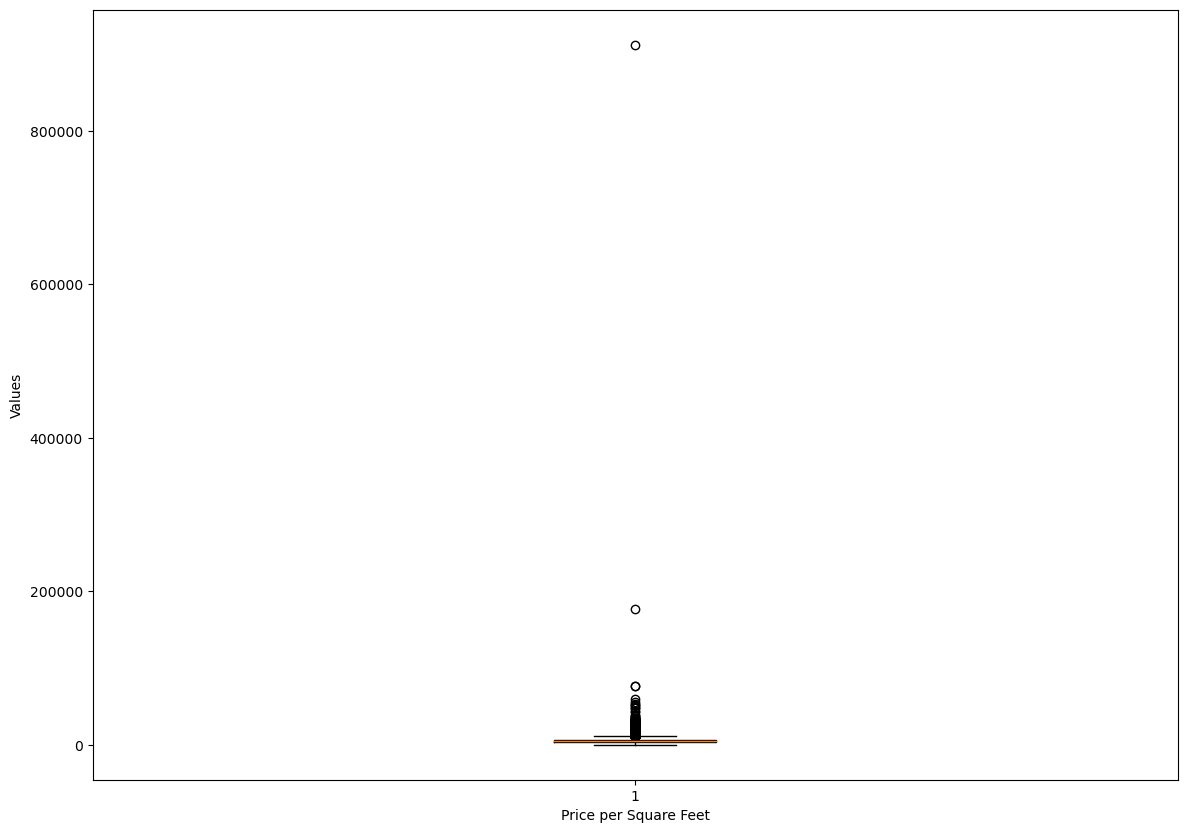

In [51]:
plt.figure(figsize=(14, 10))
plt.boxplot(df['price_per_sqft'])
plt.xlabel('Price per Square Feet')
plt.ylabel('Values')
plt.show()

we will be using z_score to detect the outliers

In [52]:
import pandas as pd
import numpy as np

z_scores = (df['price_per_sqft'] - df['price_per_sqft'].mean()) / df['price_per_sqft'].std()
outliers = df[(np.abs(z_scores) > 3) | (z_scores < -3)]

print(outliers)


                  area_type               location  total_sqft  bath    price  \
1311   Super built-up  Area                  Other      4634.0   4.0  42278.0   
2286             Plot  Area                  Other      3200.0   4.0   1200.0   
5365         Built-up  Area  Banashankari Stage II      1500.0   2.0    650.0   
6194             Plot  Area            Basavangudi      1754.0   6.0    650.0   
6421             Plot  Area           Bommenahalli      2940.0   3.0   2250.0   
7088         Built-up  Area                  Other       650.0   1.0    500.0   
7657         Built-up  Area                  Other       425.0   1.0    750.0   
7727   Super built-up  Area                  Other      5422.0   6.0   1900.0   
7883   Super built-up  Area                  Other      2000.0   3.0   1063.0   
8170   Super built-up  Area                  Other      2750.0   3.0    943.0   
8244   Super built-up  Area                  Other      2230.0   4.0    792.0   
8398   Super built-up  Area 

In [53]:
df.drop(outliers.index, inplace = True)

In [54]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12106.000000,12106.000000,12106.000000,12106.000000,12106.000000
mean,1599.424327,2.586532,111.321693,2.676359,6332.692973
std,1277.312947,1.123822,140.367057,1.033274,3604.291157
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1113.000000,2.000000,50.000000,2.000000,4251.330967
50%,1304.000000,2.000000,70.000000,3.000000,5342.356021
75%,1710.000000,3.000000,120.000000,3.000000,7000.000000
max,52272.000000,27.000000,2736.000000,27.000000,34050.179211


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12106 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12106 non-null  object 
 1   location        12106 non-null  object 
 2   total_sqft      12106 non-null  float64
 3   bath            12106 non-null  float64
 4   price           12106 non-null  float64
 5   bhk             12106 non-null  int64  
 6   price_per_sqft  12106 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 756.6+ KB


now we can remove the price_per_sqft  

In [56]:
df['bhk'].describe()

count    12106.000000
mean         2.676359
std          1.033274
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         27.000000
Name: bhk, dtype: float64

Now we will explore the number of bathroom feature. Usually for 2 bedroom we have 2 or 3 bathrooms, more than that is highly unlikely.

In [57]:
df.bath.unique()

array([ 2.        ,  5.        ,  3.        ,  4.        ,  1.        ,
        2.69258644,  8.        ,  6.        ,  7.        ,  9.        ,
       14.        , 27.        , 12.        , 16.        , 10.        ,
       13.        ])

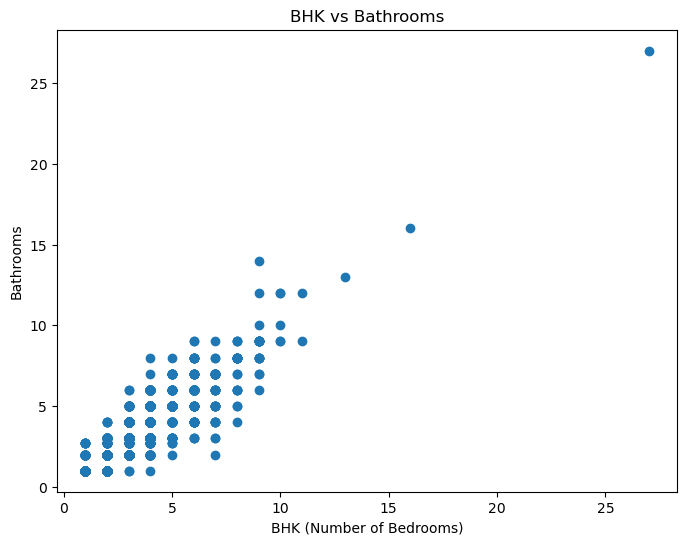

In [58]:
plt.figure(figsize=(8, 6))

plt.scatter(df['bhk'], df['bath'])
plt.xlabel('BHK (Number of Bedrooms)')
plt.ylabel('Bathrooms')
plt.title('BHK vs Bathrooms')

# Display the plot
plt.show()

In [59]:
df[df.bath>df.bhk+2]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
1078,Plot Area,Other,3300.0,14.0,500.0,9,15151.515152
2620,Super built-up Area,Other,11338.0,9.0,1000.0,6,8819.897689
6838,Super built-up Area,Rajaji Nagar,7500.0,8.0,1700.0,5,22666.666667
6937,Plot Area,5th Block Hbr Layout,2600.0,12.0,675.0,9,25961.538462
7709,Built-up Area,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
9974,Plot Area,Other,2400.0,6.0,775.0,3,32291.666667
11366,Built-up Area,Nagasandra,7000.0,8.0,450.0,4,6428.571429
11645,Plot Area,Chamrajpet,1500.0,9.0,230.0,6,15333.333333
12103,Super built-up Area,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [60]:
df = df[df.bath<df.bhk+2]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11955 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       11955 non-null  object 
 1   location        11955 non-null  object 
 2   total_sqft      11955 non-null  float64
 3   bath            11955 non-null  float64
 4   price           11955 non-null  float64
 5   bhk             11955 non-null  int64  
 6   price_per_sqft  11955 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 747.2+ KB


Use onehot encoding for location feature

In [62]:
# Perform one-hot encoding on the 'location' column
dummies = pd.get_dummies(df['location'])

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, dummies], axis='columns')

# Display the first few rows of the updated DataFrame
df.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


drop location feature

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11955 entries, 0 to 13318
Columns: 282 entries, area_type to Yeshwanthpur
dtypes: float64(4), int64(1), object(2), uint8(275)
memory usage: 3.9+ MB


countplot for price_per_sqft

Text(0, 0.5, 'Count')

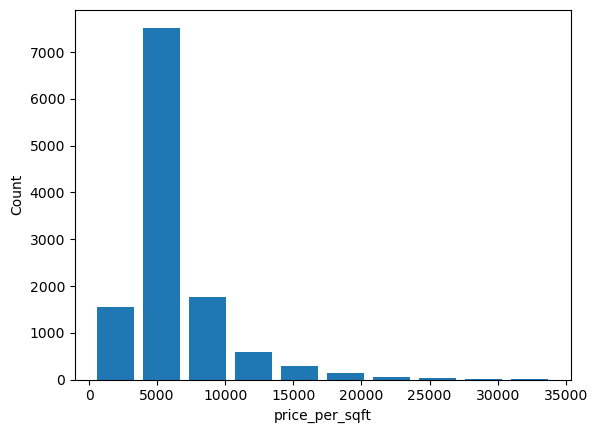

In [64]:
plt.hist(df['price_per_sqft'],rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("Count")

scatter plot for relation between bhk and price

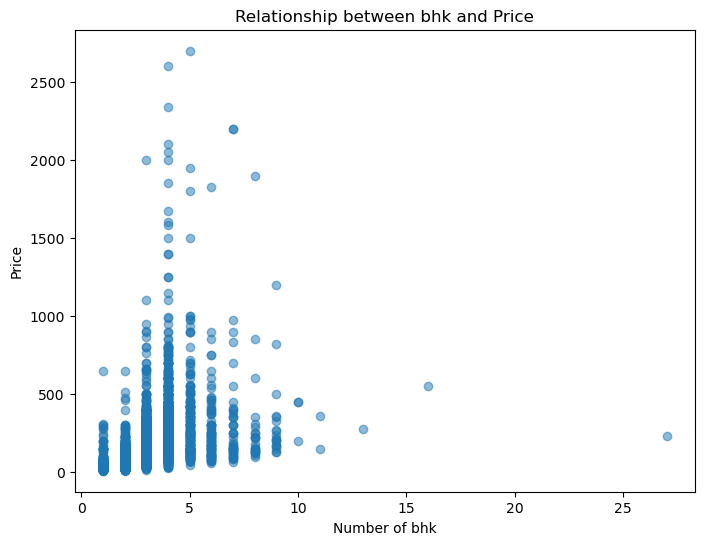

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bhk'], df['price'], alpha=0.5)
plt.xlabel('Number of bhk')
plt.ylabel('Price')
plt.title('Relationship between bhk and Price')
plt.show()


here we can clearly see that for some datapoints for less bhk the prices are higher than higher bhk

# now we will remove datapoints from the dataset where, for the same location, same area_type flat , the price of a given bhk is higher than flats with more bedrooms 

In [66]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_new = remove_bhk_outliers(df)
# df8 = df7.copy()
df_new.shape

(8455, 282)

In [67]:
df_new.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.00,4,7467.057101,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_new.shape

(8455, 282)

In [69]:
df.drop('price_per_sqft', axis = 1, inplace = True)

drop location feature

In [70]:
df_new.drop('location', axis = 1, inplace = True)

we will also be droping area_type now as it is not that important for price prediction

In [71]:
df_new.drop('area_type', axis = 1, inplace = True)

# split the data into dependent and independent features


In [72]:
df_new.head()

,total_sqft,bath,price,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,Bhoganhalli,Devarabeesana Halli,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,204.00,4,7467.057101,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X = df_new.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
0,1056.0,2.0,2,3699.810606,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3,4305.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3,6245.890861,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2,4250.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2732.0,4.0,4,7467.057101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X.shape

(8455, 279)

In [75]:
y = df_new.price
y.head(3)

0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

In [76]:
# Train, Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [77]:
X_train

,total_sqft,bath,bhk,price_per_sqft,Anekal,Banaswadi,Basavangudi,Bhoganhalli,Devarabeesana Halli,Devarachikkanahalli,...,Vittasandra,"Whietfield,",Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,"Yemlur, Old Airport Road,",Yeshwanthpur
5825,1465.0,3.0,3,5119.453925,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12791,1122.5,2.0,2,5500.222717,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10391,930.0,2.0,2,2794.623656,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,1691.0,2.0,3,6031.933767,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9266,1700.0,3.0,3,14705.882353,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,923.0,2.0,2,5417.118093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12284,1615.0,3.0,3,6000.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1372,1100.0,2.0,2,3636.363636,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8057,3200.0,4.0,4,11718.750000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_train

5825      75.00
12791     61.74
10391     25.99
1120     102.00
9266     250.00
          ...  
4389      50.00
12284     96.90
1372      40.00
8057     375.00
364       52.00
Name: price, Length: 5918, dtype: float64

# Model Training

In [79]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [80]:
# prediction
y_test_pred = regression.predict(X_test)

In [81]:
y_test_pred

array([ 97.816922  ,  26.29237142,  41.68560066, ..., 410.21383984,
       162.73261031, 126.14951344])

In [82]:
regression.score(X_test,y_test )

0.8824662854600349

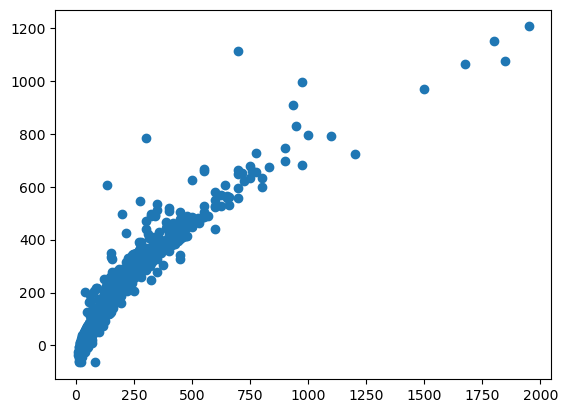

In [83]:
# plot a scatterplot for the prediction
plt.scatter(y_test, y_test_pred)

In [84]:
residuals = y_test - y_test_pred

In [85]:
residuals

7829    -17.816922
11447    19.707629
2611     14.314399
1734      6.242821
1261      0.078215
           ...    
7960     10.383042
2276    -29.128638
7114     -7.213840
11981   -12.732610
13188   -15.149513
Name: price, Length: 2537, dtype: float64

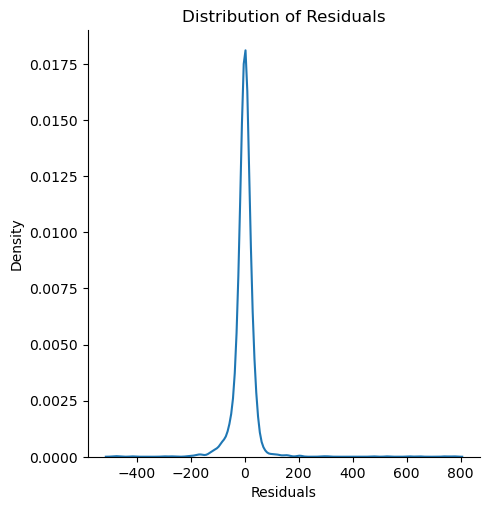

In [86]:
# plot this residuals
sns.displot(residuals, kind='kde')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_test_pred))
print(mean_squared_error(y_test, y_test_pred))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

22.807214728925057
2383.7278453608415
48.823435411294454


# R square and adjusted R square
R^2 = 1-SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [88]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_test_pred)
print(score)     

# only 88% of the variance in the dependent variable can be explained by the independent variables in linear regression model

0.8824662854600349


# Adjusted R^2 = 1-[(1-R2)*(n-1)(n-k-1)]

where:
    
R2 = the R2 of the model n : the number of observations K: the number of predictor variables

In [89]:
# display adjusted R-squared
1-(1-score)*len(y_test)-1/(len(y_test)-X_test.shape[1]-1)

-297.18347685390825

# GridSearchCV to find best model

In [90]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svm_model = SVR()

# Create a dictionary of models
models = {'Linear Regression': lr_model,
          'Random Forest': rf_model,
          'Gradient Boosting': gb_model,}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid={}, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)


Model: Linear Regression
Mean Squared Error: 2383.7278453608415
R2 Score: 0.8824662854600349

Model: Random Forest
Mean Squared Error: 301.7239638931682
R2 Score: 0.9851229919929395

Model: Gradient Boosting
Mean Squared Error: 294.02646301737093
R2 Score: 0.9855025302327465



So Random Forest and Gradient Boosting are our best models